In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

import warnings
warnings.filterwarnings('ignore')

In [1]:
# pip install pydotplus

In [3]:
df1 = pd.read_csv(r'C:\Users\adity\Documents\Machine Learning\Decision_Tree\Datasets\PastHires.csv')
df1

NameError: name 'pd' is not defined

In [ ]:
df1.shape

(13, 7)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Years Experience    13 non-null     int64 
 1   Employed?           13 non-null     object
 2   Previous employers  13 non-null     int64 
 3   Level of Education  13 non-null     object
 4   Top-tier school     13 non-null     object
 5   Interned            13 non-null     object
 6   Hired               13 non-null     object
dtypes: int64(2), object(5)
memory usage: 860.0+ bytes


In [ ]:
df1.columns

Index(['Years Experience', 'Employed?', 'Previous employers',
       'Level of Education', 'Top-tier school', 'Interned', 'Hired'],
      dtype='object')

In [ ]:
df1.isnull().sum()

Years Experience      0
Employed?             0
Previous employers    0
Level of Education    0
Top-tier school       0
Interned              0
Hired                 0
dtype: int64

In [ ]:
df1.duplicated().sum()

np.int64(0)

In [ ]:
for i in df1.columns:

    print(df1[i].unique())

[10  0  7  2 20  5  3 15  1  4]
['Y' 'N']
[4 0 6 1 2 5]
['BS' 'MS' 'PhD']
['N' 'Y']
['N' 'Y']
['Y' 'N']


In [ ]:
df = df1

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns = ['Employed?', 'Top-tier school', 'Interned','Level of Education']
for col in columns:
    df[col] = le.fit_transform(df[col])
df

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,Y
1,0,0,0,0,1,1,Y
2,7,0,6,0,0,0,N
3,2,1,1,1,1,0,Y
4,20,0,2,2,1,0,N
5,0,0,0,2,1,1,Y
6,5,1,2,1,0,1,Y
7,3,0,1,0,0,1,Y
8,15,1,5,0,0,0,Y
9,0,0,0,0,0,0,N


In [ ]:
'''
d = { 'Y': 1, 'N': 0}
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)

d1 = { 'BS': 0, 'MS': 1, 'PhD': 2}
df['Level of Education'] = df['Level of Education'].map(d1)
df
'''

"\nd = { 'Y': 1, 'N': 0}\ndf['Employed?'] = df['Employed?'].map(d)\ndf['Top-tier school'] = df['Top-tier school'].map(d)\ndf['Interned'] = df['Interned'].map(d)\n\nd1 = { 'BS': 0, 'MS': 1, 'PhD': 2}\ndf['Level of Education'] = df['Level of Education'].map(d1)\ndf\n"

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Years Experience,13.0,5.153846,6.348834,0.0,0.0,3.0,7.0,20.0
Employed?,13.0,0.384615,0.506370,0.0,0.0,0.0,1.0,1.0
Previous employers,13.0,1.769231,2.006400,0.0,0.0,1.0,2.0,6.0
Level of Education,13.0,0.769231,0.926809,0.0,0.0,0.0,2.0,2.0
Top-tier school,13.0,0.461538,0.518875,0.0,0.0,0.0,1.0,1.0
Interned,13.0,0.384615,0.506370,0.0,0.0,0.0,1.0,1.0


In [ ]:
num = df.select_dtypes(exclude=['object']).columns.tolist()
num

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

Hired


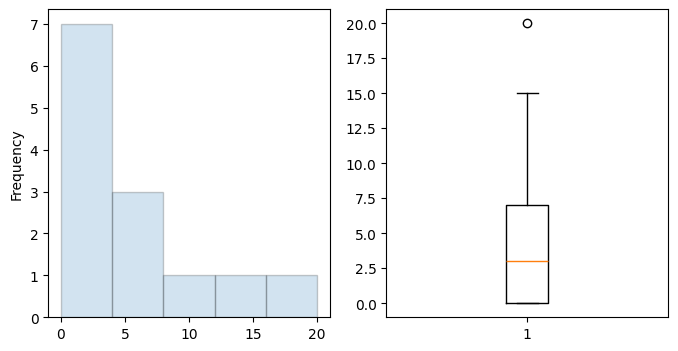

Hired


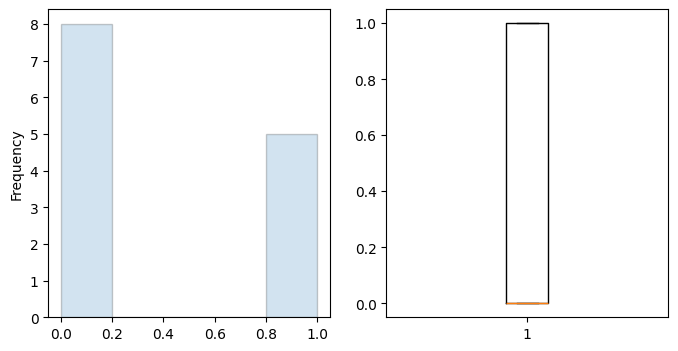

Hired


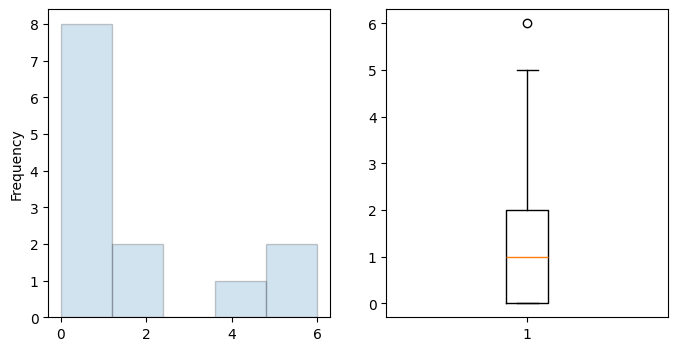

Hired


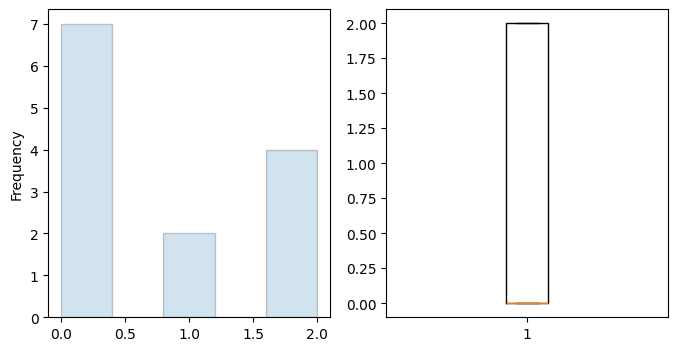

Hired


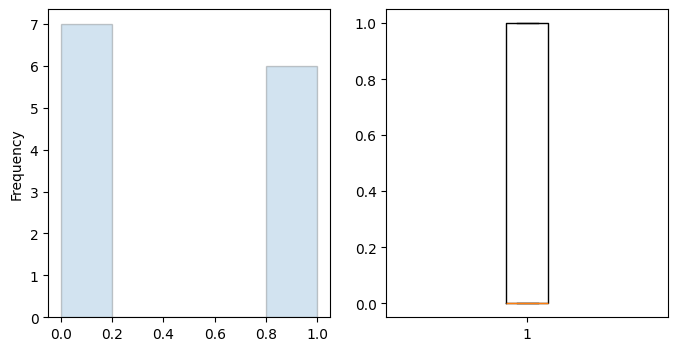

Hired


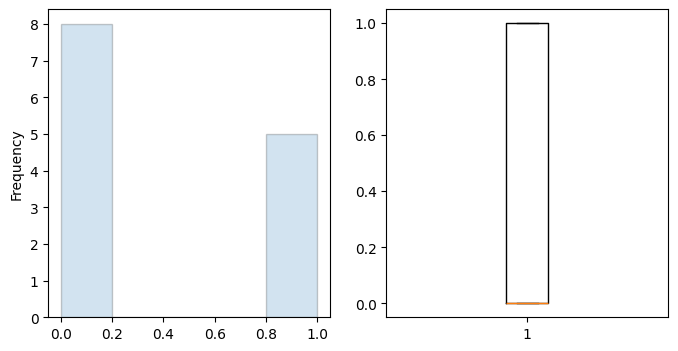

In [ ]:
for col in num:
    print(i)
    
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    df[col].hist(bins=5, alpha=0.2, grid=False, edgecolor='black')
    plt.ylabel('Frequency')
    
    plt.subplot(1,2,2)
    plt.boxplot(df[col])
    plt.show()

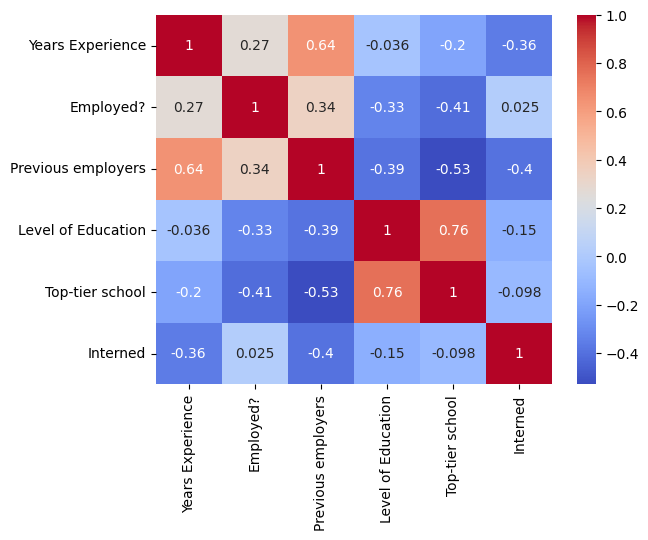

In [ ]:
corr = df[num].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
features = df.columns.tolist()[:6]
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

In [ ]:
y = df["Hired"]
X = df[features]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [ ]:
model = DecisionTreeClassifier(criterion='entropy') # gini
model.fit(X_train, y_train)
model

DecisionTreeClassifier(criterion='entropy')

In [ ]:
import math

#function to calculate entropy
def entropy(columns):
    counts = columns.value_counts()
    probabilities = counts/len(columns)
    return -sum(probabilities * probabilities.apply(math.log))

#function to calculate conditional entropy
def conditional_entropy(data, features, target):
    features_values = data[features].unique()
    weighted_entropy = 0
    for value in features_values:
        subset = data[data[features] == value]
        weighted_entropy += len(subset)/len(data) * entropy(subset[target])
    return weighted_entropy

#function to calculate information gain
def information_gain(data, features, target):
    total_entropy = entropy(data[target])
    features_conditional_entropy = conditional_entropy(data, features, target)
    return total_entropy - features_conditional_entropy

#function to calculate information gain ratio
for feature in features:
    ig = information_gain(df, feature, 'Hired')
    print(f"Information Gain of {feature}:{ig}")

Information Gain of Years Experience:0.4442155713860929
Information Gain of Employed?:0.1906896586165291
Information Gain of Previous employers:0.1645513452633911
Information Gain of Level of Education:0.08182055108906616
Information Gain of Top-tier school:0.001320836663751046
Information Gain of Interned:0.1906896586165291


In [ ]:
#Export the tree to dot format
dot_data = export_graphviz(model, out_file= None, feature_names=X_train.columns, precision=2, filled=True, rounded=True)

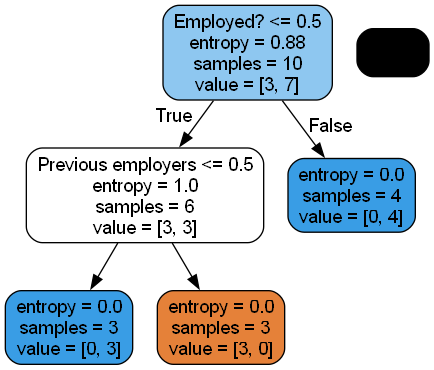

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
y_test

9    N
8    Y
7    Y
Name: Hired, dtype: object

In [ ]:
y_pred = model.predict(X_test)
y_pred

array(['Y', 'Y', 'N'], dtype=object)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

#print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.3333333333333333
Classification Report:
               precision    recall  f1-score   support

           N       0.00      0.00      0.00         1
           Y       0.50      0.50      0.50         2

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3

Confusion Matrix:
 [[0 1]
 [1 1]]


In [ ]:
y_train

2     N
6     Y
10    N
1     Y
4     N
12    Y
5     Y
0     Y
3     Y
11    Y
Name: Hired, dtype: object

In [ ]:
X_train

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned
2,7,0,6,0,0,0
6,5,1,2,1,0,1
10,1,0,1,2,1,0
1,0,0,0,0,1,1
4,20,0,2,2,1,0
12,0,0,0,2,1,0
5,0,0,0,2,1,1
0,10,1,4,0,0,0
3,2,1,1,1,1,0
11,4,1,1,0,0,1


In [ ]:
new_data = [[10, 1, 4, 0, 1, 0]]
y_pred = model.predict(new_data)
y_pred[0]

'Y'